In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso
import warnings

warnings.filterwarnings('ignore')

In [2]:
telco_df=pd.read_csv('Telco_Customer_Churn_Data.csv') # Dataframe
y=telco_df['Churn']
telco_df['TotalCharges']=pd.to_numeric(telco_df['TotalCharges'],downcast='float',errors='coerce')
telco_df['SeniorCitizen']=telco_df['SeniorCitizen'].astype('object')
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

In [3]:
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.500000,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.899902,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.450012,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.600006,Yes


In [4]:
y=y.map({'Yes':1 ,'No':0}) # since with tking yes or no as we end up with the predictions being yes or no too. but we cannot pass that to the R2_score and hence cant calculate r2_score so we have to convert the yes or no to 1 and 0.

# it is not possible convert the same with "Predictions" because it is a numpy array and the map function only takes list 


In [5]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [6]:
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.500000,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.899902,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.450012,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.600006,Yes


In [7]:
na_df=pd.DataFrame({'col_name':telco_df.columns,'na_count':telco_df.isnull().sum(),
              'na_pc':telco_df.isnull().sum()/telco_df.shape[0]*100})

cols_50grt_nas=list(na_df[na_df['na_pc']>50]['col_name'].index)
cols_50grt_nas

[]

In [8]:
cols_unique_same=[]
for col in telco_df.columns:
    if telco_df[col].nunique()==1 or telco_df[col].nunique()==telco_df.shape[0]:
        cols_unique_same.append(col)
        
cols_unique_same


cols_to_drop=cols_50grt_nas+cols_unique_same

cols_to_drop.append('Churn')

telco_df.drop(columns=cols_to_drop,inplace=True)

In [9]:
num_cols=[col for col in telco_df.columns if telco_df[col].dtype!='object']

cat_cols=[col for col in telco_df.columns if telco_df[col].dtype=='object']


In [10]:
X_train,X_test,y_train,y_test=train_test_split(telco_df,y,test_size=0.2,random_state=42)

In [11]:
for col in num_cols:
    X_train[col]=X_train[col].fillna(X_train[col].mean())
    X_test[col]=X_test[col].fillna(X_train[col].mean())
    
for col in cat_cols:
    X_train[col]=X_train[col].fillna(X_train[col].mode()[0])
    X_test[col]=X_test[col].fillna(X_train[col].mode()[0])

In [12]:
scaler=StandardScaler()

for col in num_cols:
    X_train[col]=scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=scaler.transform(np.array(X_test[col]).reshape(-1,1))

In [13]:
oe_train=pd.get_dummies(X_train[cat_cols])
oe_test=pd.get_dummies(X_test[cat_cols])

In [14]:
oe_train_final,oe_test_final=oe_train.align(oe_test,join='inner',axis=1,fill_value=0)

In [15]:
X_train_final=pd.concat([X_train[num_cols],oe_train_final],axis=1)
X_test_final=pd.concat([X_test[num_cols],oe_test_final],axis=1)
X_train_final

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,-0.465683,-0.000474,-0.422105,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1
1623,0.885537,1.074754,1.255360,0,1,0,1,0,1,0,...,1,0,0,1,0,1,1,0,0,0
6074,-1.284605,-1.376499,-1.002991,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1362,-1.161766,0.177346,-0.908119,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
6754,-1.325551,-0.098524,-0.000003,0,0,1,1,0,0,1,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-1.284605,1.001632,-0.971345,0,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
5191,-0.383791,0.872006,-0.041069,0,1,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
5226,-0.834198,-1.452945,-0.877999,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5390,-0.834198,1.149538,-0.482544,1,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0


In [16]:
X_train_final.shape
len(y_train)

5634

In [17]:
logreg=LogisticRegression()
logreg.fit(X_train_final,y_train)

pred=logreg.predict(X_test_final)

pred



array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
#pred.map( {'Yes':1 ,'No':0})
#list_pred=list(pred)
#pred.replace("Yes", "1")

In [19]:
r2_score(y_test,pred)

print('Test Score',logreg.score(X_train_final,y_train))

print('Test Score',logreg.score(X_test_final,y_test))


Test Score 0.8029818956336529
Test Score 0.8218594748048261


In [20]:
from sklearn.tree import DecisionTreeClassifier

dcsn_tree_clsfr=DecisionTreeClassifier()
dcsn_tree_clsfr.fit(X_train_final,y_train)

DecisionTreeClassifier()

In [21]:
print('Train Score',dcsn_tree_clsfr.score(X_train_final,y_train))

print('Test Score',dcsn_tree_clsfr.score(X_test_final,y_test))

Train Score 0.9985800496982605
Test Score 0.7182398864442867


In [22]:
n_estimates=list(range(20,200,20))

from sklearn.ensemble import RandomForestClassifier

accuracy=[]
for val in n_estimates:
    rndm_frt_cfr=RandomForestClassifier(n_estimators=val)
    rndm_frt_cfr.fit(X_train_final,y_train)
    accuracy.append(rndm_frt_cfr.score(X_train_final,y_train))
accuracy_rndm_frst=accuracy


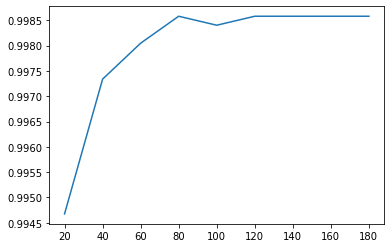

In [23]:
from matplotlib.pyplot import plot
plot(n_estimates,accuracy)

In [24]:
param_dict={'criterion':['gini', 'entropy'],
            'min_samples_split':[4,7,9],
            'max_depth':[7,8,9],
           'max_features':['auto', 'sqrt', 'log2']}
from  sklearn.model_selection import GridSearchCV
gcv= GridSearchCV(dcsn_tree_clsfr,param_grid=param_dict,cv=5,verbose=5)
gcv.fit(X_train_final,y_train)



Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=7; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=7; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=7; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=7; total time=   0.0s
[CV 5/5] END criterion=gini, 

[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_split=9; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_split=9; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_split=9; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=7; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=7; total tim

[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_split=7; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_split=7; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_split=9; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_split=9; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_split=9; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_split=9; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_split=9; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=4; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, 

[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_split=4; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_split=4; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_split=7; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_split=7; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_split=7; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_split=7; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_split=7; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_split=9; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_split=9; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [4, 7, 9]},
             verbose=5)

In [25]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
kmean=KMeans()
kmean.fit(X_train_final)



KMeans()

In [26]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
kmean=KMeans()
kmean.fit(X_train_final)

KMeans()

Text(0.5, 1.0, 'Elbow Curve')

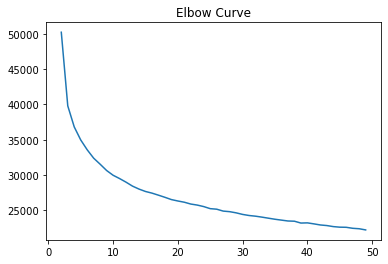

In [27]:
num_clusters=range(2,50)

wss=[]

for n in num_clusters:
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(X_train_final)
    wss.append(kmeans.inertia_)
    
plt.plot(num_clusters,wss)
plt.title('Elbow Curve')

In [28]:
k_means_1=KMeans(n_clusters=40)
k_means_1.fit(X_train_final)

k_means_1.predict(X_test_final)

array([20, 15, 12, ...,  1, 14, 20])